## Salary estimation and prediction using Linear Regression and Decision Tree Regressor

#### Overview
In this project, we'll estimate the value of Annual Salary of each customer from the data available and build a prediction model
to predict the Annual Salary of customers of a Financial Services Company.

We'll be doing the following steps to implement this project:
- we'll collect the data
- we'll preprocess the data by removing the missing values, handling outliers and calculating new features
- we'll then create a dataframe with all the relevant features and spilt it into a train set and test set
- we'll then fit our data to our prediction models Linear Regression and Decision Tree Regerssor and predict the values

#### Data
- This project has been done as a part of the ANZ Virtual Internship Program and the data was provided by them.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading dataset as a pandas dataframe
data = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
# function to view the categories and their count of all the variables of a dataset
def cat(x):
    for i in x.columns:
        print(x[i].value_counts())

In [4]:
cat(data)

authorized    7717
posted        4326
Name: status, dtype: int64
1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64
0                                        883
 LAND WATER & PLANNING East Melbourne      1
 THE DISCOUNT CHEMIST GROUP                1
Name: bpay_biller_code, dtype: int64
ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-1998563091     40
ACC-3881031190     37
ACC-721712940      34
ACC-4059612845     31
ACC-1217063613     25
Name: account, Length: 100, dtype: int64
AUD    12043
Name: currency, dtype: int64
153.41 -27.95    578
151.23 -33.94    303
116.06 -32.00    292
145.45 -37.74    260
153.10 -27.66    259
                ... 
149.03 -35.25     40
149.19 -21.15     37
145.09 -37.82     34
130.98 -12.49     31
147.61 -37.82     25
Name: long_lat, Length: 100, dtype: int64
SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BA

We'll create a dataset consisting of only salary related transactions as we want to eastimate the annual salary of each 
customer 

In [5]:
df = data[data['txn_description']== 'PAY/SALARY']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 50 to 12004
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             883 non-null    object        
 1   card_present_flag  0 non-null      float64       
 2   bpay_biller_code   883 non-null    object        
 3   account            883 non-null    object        
 4   currency           883 non-null    object        
 5   long_lat           883 non-null    object        
 6   txn_description    883 non-null    object        
 7   merchant_id        0 non-null      object        
 8   merchant_code      883 non-null    float64       
 9   first_name         883 non-null    object        
 10  balance            883 non-null    float64       
 11  date               883 non-null    datetime64[ns]
 12  gender             883 non-null    object        
 13  age                883 non-null    int64         
 14  merchan

### Data preprocessing

##### Missing values

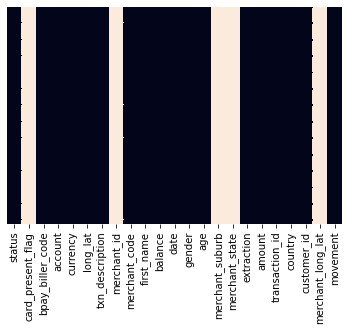

In [7]:
# Checking for missing values with the help of a heatmap
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

#### Dropping irrelevant columns

In [8]:
# Removing the columns with null vales and which are not relevant to our computation
df.drop(['merchant_id','merchant_suburb','merchant_state','merchant_long_lat','bpay_biller_code','merchant_code','first_name',
         'country','extraction','currency','card_present_flag', 'txn_description','status','movement'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 50 to 12004
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   account         883 non-null    object        
 1   long_lat        883 non-null    object        
 2   balance         883 non-null    float64       
 3   date            883 non-null    datetime64[ns]
 4   gender          883 non-null    object        
 5   age             883 non-null    int64         
 6   amount          883 non-null    float64       
 7   transaction_id  883 non-null    object        
 8   customer_id     883 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 69.0+ KB


In [10]:
df.head()

,account,long_lat,balance,date,gender,age,amount,transaction_id,customer_id
50,ACC-588564840,151.27 -33.76,8342.11,2018-08-01,M,23,3903.95,9ca281650e5d482d9e53f85e959baa66,CUS-1462656821
61,ACC-1650504218,145.01 -37.93,2040.58,2018-08-01,F,23,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,CUS-2500783281
64,ACC-3326339947,151.18 -33.80,3158.51,2018-08-01,M,22,983.36,bd62b1799a454cedbbb56364f7c40cbf,CUS-326006476
68,ACC-3541460373,145.00 -37.83,2517.66,2018-08-01,M,24,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,CUS-1433879684
70,ACC-2776252858,144.95 -37.76,2271.79,2018-08-01,F,43,1068.04,f50ccf1195214d14a0acbfcb5a265193,CUS-4123612273


In [11]:
df.describe()

,balance,age,amount
count,883.000000,883.000000,883.000000
mean,16242.859049,32.631937,1898.728029
std,30953.342656,12.276731,1150.364621
min,735.660000,18.000000,576.000000
25%,4309.995000,22.000000,1013.670000
50%,7532.540000,30.000000,1626.480000
75%,14370.765000,40.000000,2538.680000
max,267128.520000,78.000000,8835.980000


#### Presence of Outliers

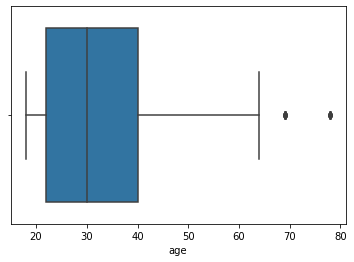

In [12]:
# checking for outliers in the age variable
sns.boxplot(df['age'])

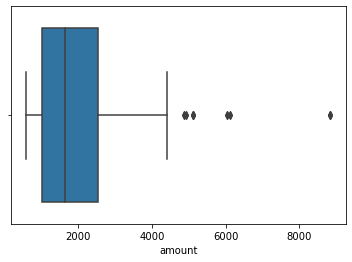

In [13]:
# checking for outliers in the amount variable
sns.boxplot(df['amount'])

In [14]:
# handling of outliers in the amount variable
am = []
for i in df['amount']:
    if (i <= 5000):
        am.append(i)
    else:
        am.append(None)
        
df['amount_'] = am

<ipython-input-14-1f653416cae4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amount_'] = am


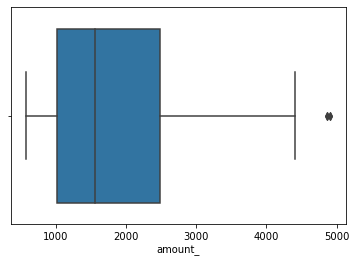

In [15]:
sns.boxplot(df['amount_'])

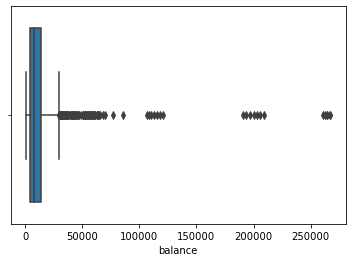

In [16]:
# checking for outliers in the balance variable
sns.boxplot(df['balance'])

In [17]:
# handling of outliers in the balance variable
bal = []
for i in df['balance']:
    if (i <= 25000):
        bal.append(i)
    else:
        bal.append(None)
        
df['balance_'] = bal

<ipython-input-17-f249bf428cd7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balance_'] = bal


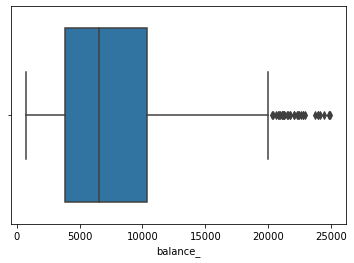

In [18]:
sns.boxplot(df['balance_'])

In [19]:
df.isnull().sum()

account             0
long_lat            0
balance             0
date                0
gender              0
age                 0
amount              0
transaction_id      0
customer_id         0
amount_            13
balance_          125
dtype: int64

In [20]:
# dropping the null values
df.dropna(inplace=True)

<ipython-input-20-e05b9f1f3475>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [21]:
#before salary balance
df['bs_balance'] = df['balance_']-df['amount_']

<ipython-input-21-282316d2dfff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bs_balance'] = df['balance_']-df['amount_']


In [22]:
# transacted amount per customer
a3 = df['amount_'].groupby(df['customer_id']).sum()
a3 = a3.tolist()

In [23]:
# estimating the annual salary of each customer
sal = []
for i in a3:
    sal.append((i*12)/3)

(array([ 8., 18., 20., 11.,  6.,  6.,  4.,  4.,  3.,  2.]),
 array([ 28623.84 ,  39219.108,  49814.376,  60409.644,  71004.912,
         81600.18 ,  92195.448, 102790.716, 113385.984, 123981.252,
        134576.52 ]),
 <a list of 10 Patch objects>)

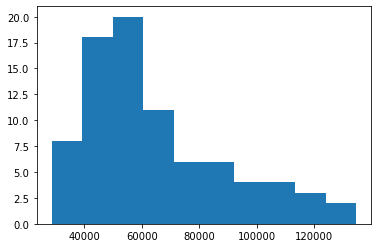

In [24]:
plt.hist(sal)

In [25]:
#transaction volume by each customer
tran_vol = df['customer_id'].value_counts().tolist()

In [26]:
# renaming the gender variable
df['gender'].replace({'F': 1, 'M': 0}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [27]:
# grouping the data by customer_id
df_ = df.groupby(['customer_id']).mean()

In [28]:
df_['tran_vol'] = tran_vol
df_.head()

,balance,gender,age,amount,amount_,balance_,bs_balance,tran_vol
customer_id,,,,,,,,
CUS-1005756958,4718.665385,1,53,970.47,970.47,4718.665385,3748.195385,14
CUS-1117979751,11957.202857,0,21,3578.65,3578.65,11957.202857,8378.552857,14
CUS-1140341822,5841.720000,0,28,1916.51,1916.51,5841.720000,3925.210000,14
CUS-1147642491,8813.467692,1,34,1711.39,1711.39,8813.467692,7102.077692,14
CUS-1196156254,20270.395000,1,34,3903.73,3903.73,20270.395000,16366.665000,14


In [29]:
df_.drop(['balance','amount'], axis=1, inplace=True)

In [30]:
df_.head()

,gender,age,amount_,balance_,bs_balance,tran_vol
customer_id,,,,,,
CUS-1005756958,1,53,970.47,4718.665385,3748.195385,14
CUS-1117979751,0,21,3578.65,11957.202857,8378.552857,14
CUS-1140341822,0,28,1916.51,5841.720000,3925.210000,14
CUS-1147642491,1,34,1711.39,8813.467692,7102.077692,14
CUS-1196156254,1,34,3903.73,20270.395000,16366.665000,14


In [31]:
dict = {'customer_id':df_['balance_'].index.tolist(), 'age': df_['age'].tolist(), 'gender': df_['gender'].tolist(), 
        'avg_balance': df_['balance_'].tolist(), 'avg_amount': df_['amount_'].tolist(),'tran_vol': df_['tran_vol'].tolist(), 'anu_salary': sal,
       'bs_balance': df_['bs_balance'].tolist()}

In [32]:
data_ = pd.DataFrame(dict)
data_.head()

,customer_id,age,gender,avg_balance,avg_amount,tran_vol,anu_salary,bs_balance
0,CUS-1005756958,53,1,4718.665385,970.47,14,50464.44,3748.195385
1,CUS-1117979751,21,0,11957.202857,3578.65,14,100202.20,8378.552857
2,CUS-1140341822,28,0,5841.720000,1916.51,14,45996.24,3925.210000
3,CUS-1147642491,34,1,8813.467692,1711.39,14,88992.28,7102.077692
4,CUS-1196156254,34,1,20270.395000,3903.73,14,62459.68,16366.665000


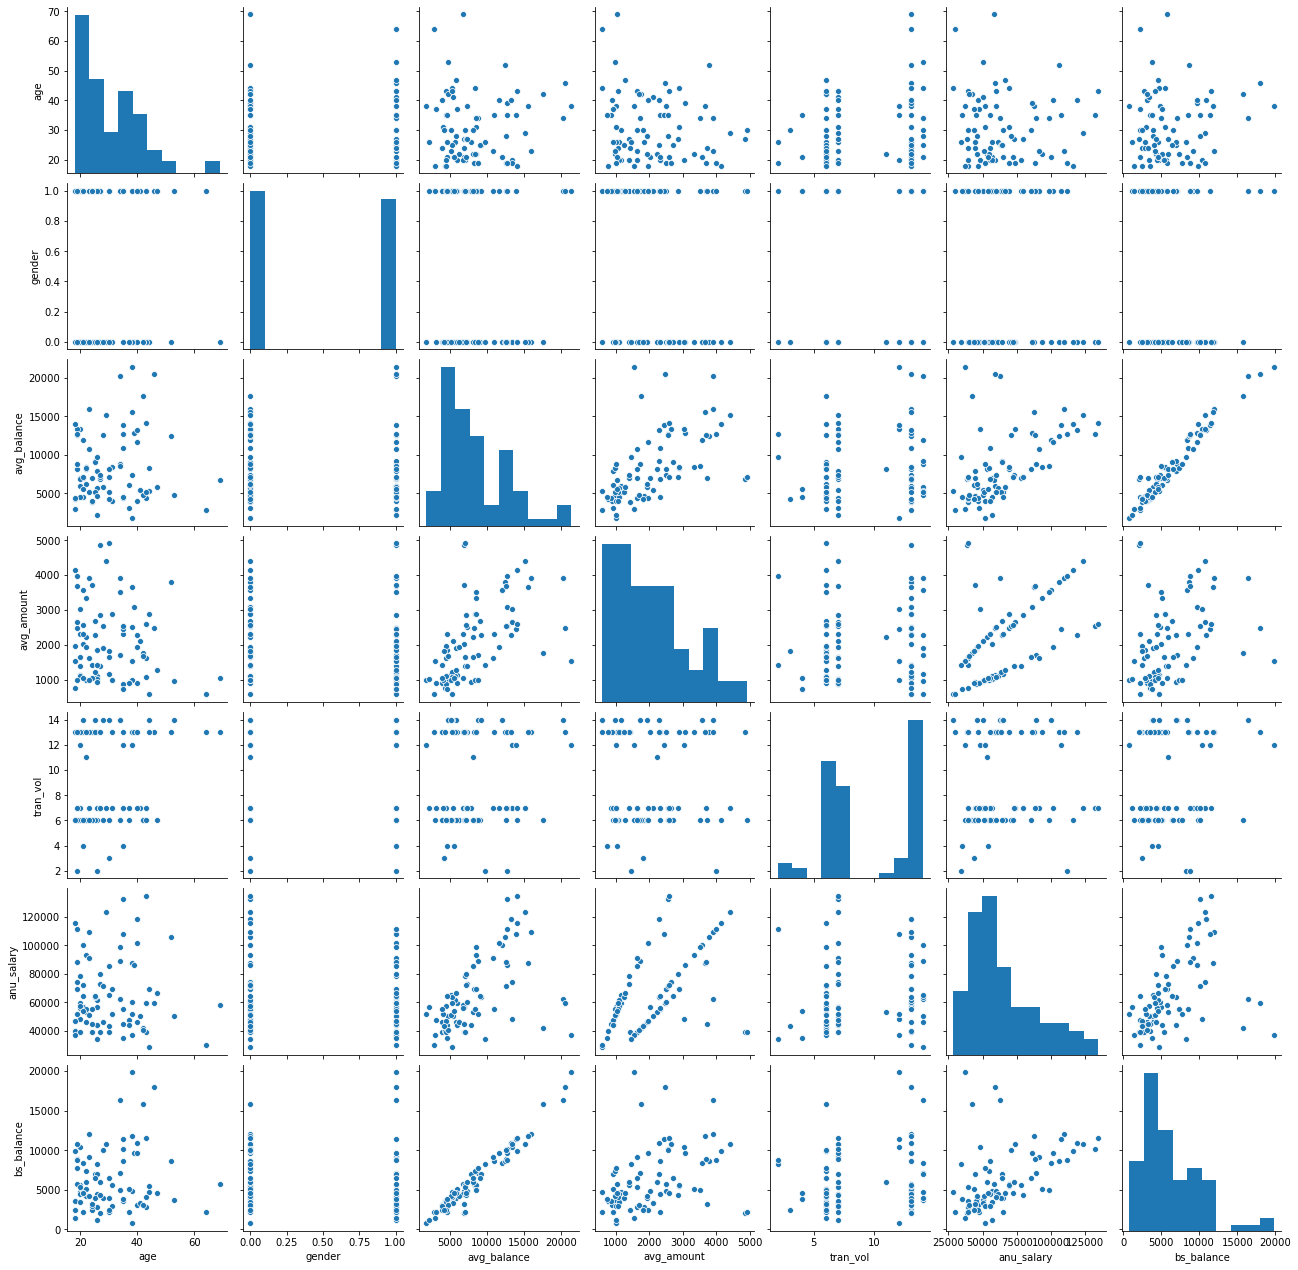

In [33]:
sns.pairplot(data_)

In [34]:
# Creating the X independent and y dependent variables
X = data_[['age','gender','avg_balance','avg_amount','tran_vol','bs_balance']]
y = data_['anu_salary']

In [35]:
# splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=101)

In [36]:
print(X_train.shape), print(X_test.shape)

(72, 6)
(10, 6)


(None, None)

### Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
pred = lm.predict(X_test)

Text(0, 0.5, 'Predicted values')

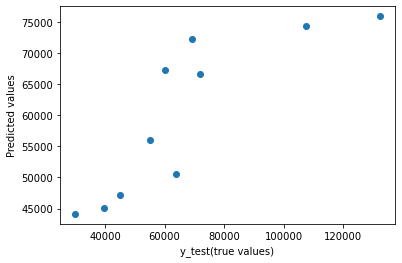

In [38]:
# plotting actual values and predicted values
plt.scatter(y_test,pred)
plt.xlabel('y_test(true values)')
plt.ylabel('Predicted values')

In [39]:
# root mean square error
from sklearn import metrics
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,pred)))

# R2 score
from sklearn.metrics import r2_score
print(r2_score(y_test, pred))

RMSE 21866.40707376655
0.45371465409710865


### Decision Tree Regressor

In [55]:
# fitting and training the model
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
regressor = tree.DecisionTreeRegressor()
regressor.fit(X_train,y_train)

# predicting the annual salary
pred2 = regressor.predict(X_test)

Text(0, 0.5, 'Predicted values')

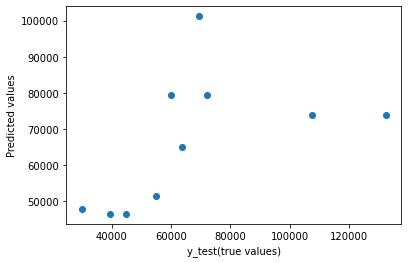

In [56]:
# plotting actual values and predicted values
plt.scatter(y_test,pred2)
plt.xlabel('y_test(true values)')
plt.ylabel('Predicted values')

In [57]:
# root mean square error
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,pred2)))

# R2 score
from sklearn.metrics import r2_score
print(r2_score(y_test, pred2))

RMSE 25248.043554312888
0.2716834908360396


Among the above two prediction models, Linear Regression performs better in predicting the Annual Salary of the customers comparatively.
I believe, The accuarcy can be improved by gathering more data.